# Diabetes Onset Detection -- Exploratory Data Analysis

## Goal
1. Load data from the output of data cleaning notebook
2. Ask and answer questions
3. Make conclusions from the observation 

### Importing useful packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# supress warnings
import warnings
warnings.filterwarnings("ignore")

sns.set()
sns.set_style("whitegrid")

### Load data
We will load the `diabetes_nan.csv` from our data cleaning notebook, this would be the data that has outliers treated already, however, the missing data still exist in this dataset, thus we will impute the missing data again in order to perform exploratory data analysis, we simply use mean to impute each column, instead of using imputer package from sklearn, this time we will use the built-in pandas dataframe method `df.fillna()`

In [2]:
diabetes = pd.read_csv('../Data/diabetes_nan.csv')

In [3]:
# check the number of missing value in each column
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [4]:
# fill the missing value with mean in each column
diabetes.fillna(diabetes.mean(), inplace=True)

In [5]:
# check the number of missing value again
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,146.5,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.00000,146.5,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.05915,146.5,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.00000,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.00000,168.0,43.1,1.200,33.0,1


### Univariate Analysis
We will first perform univariate analysis to visualize some continuous variables to better understand our data, we will be using histogram to get the distribution of a certain feature, we will focus on the `Pregnancies`, `BMI` and `Age` features, since those variables are theoretically playing a more important role in whether a patient get diabetes or not. The analysis could also help us answer some simple questions about the dataset.

#### Question 1: What are the age distribution in all patients? Are there mostly young people or old people? Or equal?

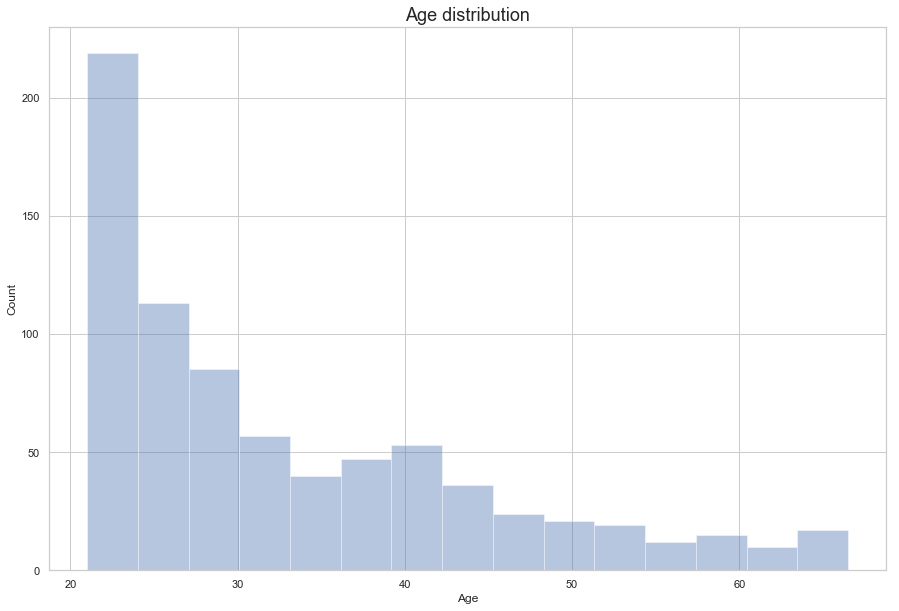

In [7]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.distplot(diabetes['Age'], kde=False, bins=15)
ax.set_title('Age distribution', size=18)
ax.set_ylabel('Count')
plt.show()

#### Answer: We can see that our dataset is composed mostly by young people between age 20 to 30, the age column is right skewed and there are relatively fewer old people

Next we will examine the `Pregnancies` column

#### Question 2: Did the patients in the dataset have pregnant experience? 

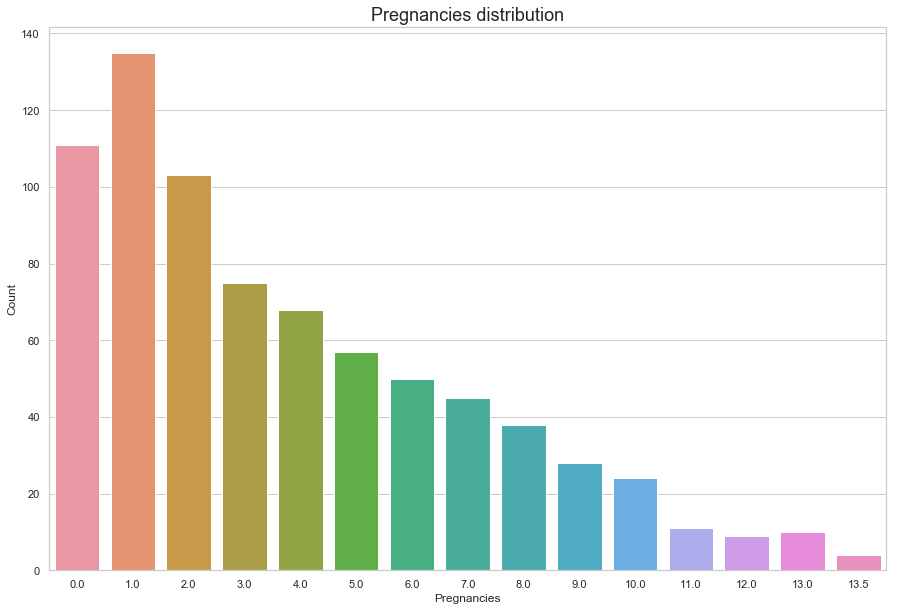

In [8]:
# create countplot since the feature is more like discrete than continous variable
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.countplot(diabetes['Pregnancies'])
ax.set_title('Pregnancies distribution', size=18)
ax.set_ylabel('Count')
plt.show()

#### Answer: From above, we can see that most of the patients in our dataset has 0 to 2 pregnancies, recall that this dataset composed of only female, so there are no bias factor like gender here, since even with 0 pregnancy has no male in it. This is kind of consistent to our observation previously in the age distribution, since younger women has fewer pregnancies than older women in general. 

We will observe how the `BMI` feature distribution look in our dataset

#### Question 3: How fit are the patients in the dataset? 

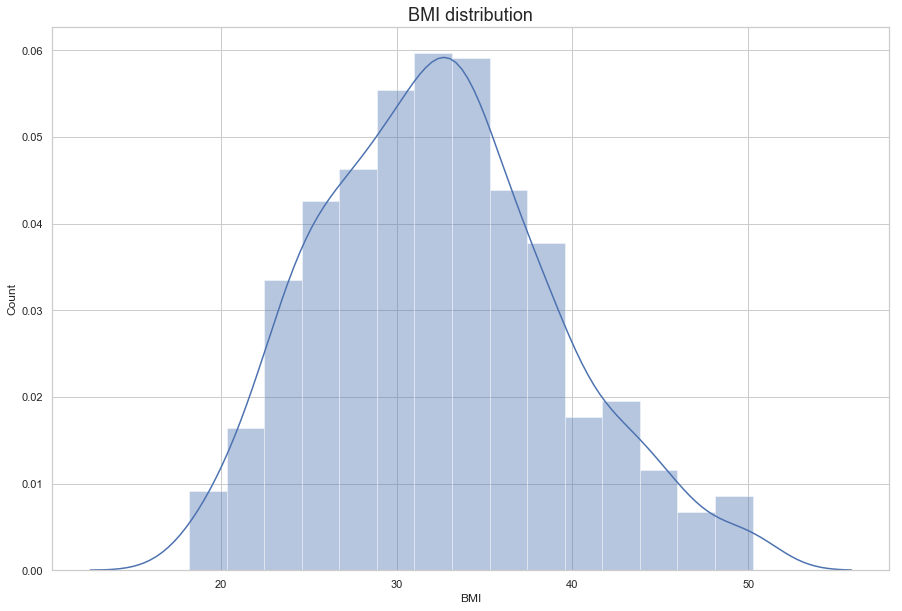

In [9]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.distplot(diabetes['BMI'], kde=True, bins=15)
ax.set_title('BMI distribution', size=18)
ax.set_ylabel('Count')
plt.show()

#### Answer: We can see that BMI distribution looks more normal distribution than other two variables we have shown, however, from the [information](https://www.cancer.org/cancer/cancer-causes/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html) online, we can see that the majority of our patients have BMI range from 25 to 40, this is considered in the "Overweight" and "Obese" category as the information provided. In other words, the dataset consist a lot more overweight patients than normal and underweight patients. 

### Bivariate Analysis
From the above univariate analysis, we can see that there might exist some interesting relationship between some variables, we will ask some questions and try to use the data analysis to answer ourselves.

#### Question 4: Follow up from the univariate analysis, does age play a strong role of patient has diabetes or not? How about BMI? 

In [10]:
diabetes['Age'].describe()

count    768.000000
mean      33.199870
std       11.628404
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       66.500000
Name: Age, dtype: float64

In order to answer this question, we first need to categorize the `Age` column, from above, we can see that `Age` variable ranges from around 20 to 70, we will separate the patients into five groups: 20-30, 30-40, 40-50, 50-60 and 60+

In [11]:
# create a helper function to help us categorize the age column
def age(col):
    if col >= 20 and col < 30:
        return '[20,30)'
    elif col >= 30 and col < 40:
        return '[30,40)'
    elif col >= 40 and col < 50:
        return '[40,50)'
    elif col >= 50 and col < 60:
        return '[50,60)'
    else:
        return '60+'

# vectorize the function
age_v = np.vectorize(age)

In [12]:
# create new column Age_cat
diabetes['Age_cat'] = age_v(diabetes['Age'])
diabetes['Age_cat'].value_counts()

[20,30)    396
[30,40)    165
[40,50)    118
[50,60)     57
60+         32
Name: Age_cat, dtype: int64

We will make a barplot to compare the number of diabetic patients in each age category

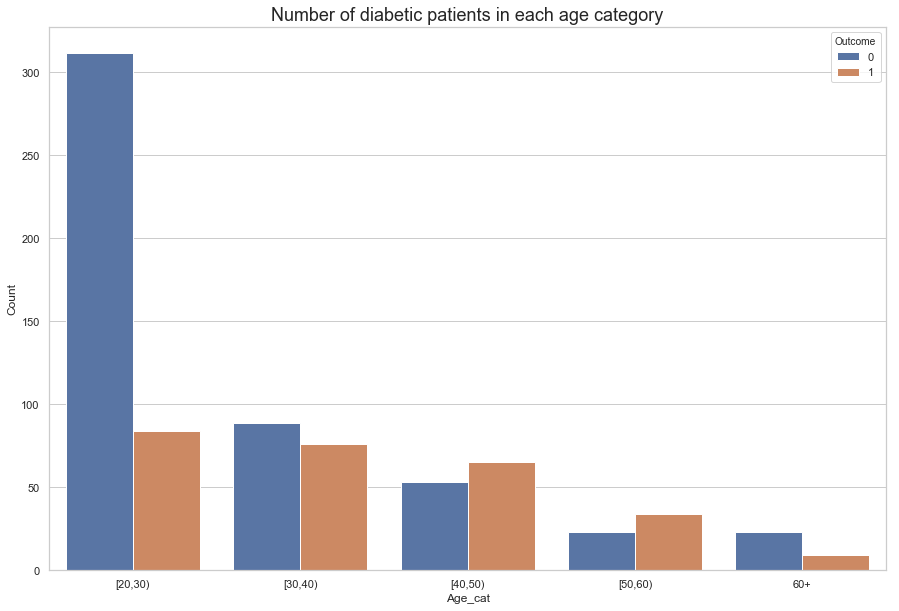

In [13]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
order = ['[20,30)', '[30,40)', '[40,50)', '[50,60)', '60+']
ax = sns.countplot(x='Age_cat', hue='Outcome', data=diabetes, order=order)
ax.set_title('Number of diabetic patients in each age category', size=18)
ax.set_ylabel('Count')
plt.show()

We can see that the trend that in general, older patients have higher percentage of diabetes than younger patients, it is especially obvious in the youngest group, most of the people do not have diabetes, however, there is an exception of the oldest people group, there are more non-diabetic people in that group. 

Next, we will apply the same idea on `BMI` column. We will use the category from the link above to categorize the BMI variable.

In [14]:
# create a helper function to help us categorize the age column
def BMI(col):
    if col < 18.5:
        return 'Underweight'
    elif col >= 18.5 and col < 25:
        return 'Normal weight'
    elif col >= 25 and col < 30:
        return 'Overweight'
    elif col >= 30:
        return 'Obese'
    
# vectorize the function
BMI_v = np.vectorize(BMI)

In [15]:
diabetes['BMI_cat'] = BMI_v(diabetes['BMI'])

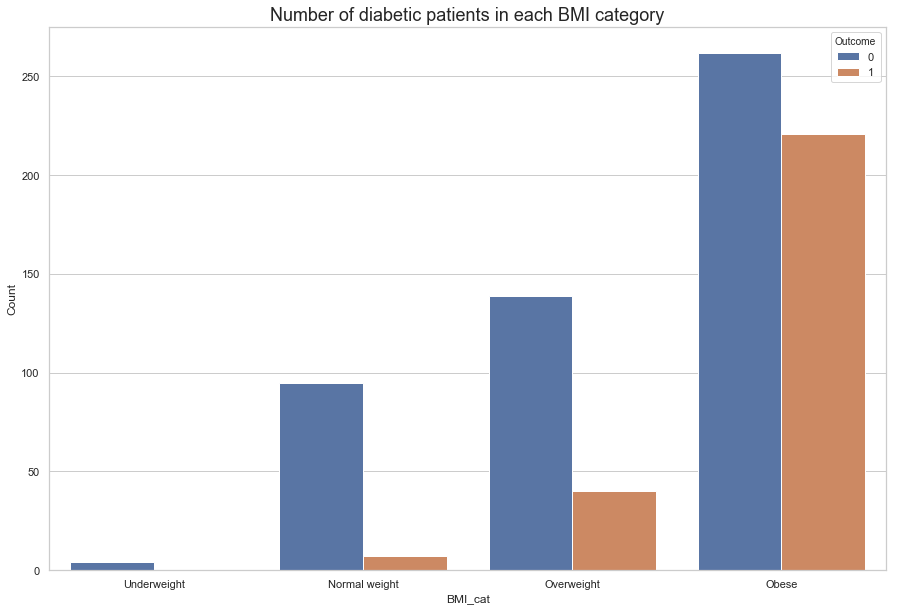

In [16]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
order = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
ax = sns.countplot(x='BMI_cat', hue='Outcome', data=diabetes, order=order)
ax.set_title('Number of diabetic patients in each BMI category', size=18)
ax.set_ylabel('Count')
plt.show()

As expected, the overweight or obese group have higher percentage of diabetes since obesity has a pretty [strong correlation with type2 diabetes](https://www.obesityaction.org/community/article-library/obesity-and-type-2-diabetes/)

#### Answer: From the graph we have shown, we can see that older people category seems to have higer percentage of diabetes compare to younger women, there is an exception of the oldest group, there could be several factors that cause this, there might have been healthier adults in that group, even the sample selection should be random. Regarding the BMI value, we can easily tell that people with obesity problem tends to have diabetic problem at the same time as well, the proportion of the diabetic patients in the Obese group is close to 50%.

### Question 5: There was an interesting measurement called skin thickness, does it have anything to do with diabetes? How about preganacies?

We will make a boxplot to compare both the `SkinThickness` in diabetic and non-diabetic group.

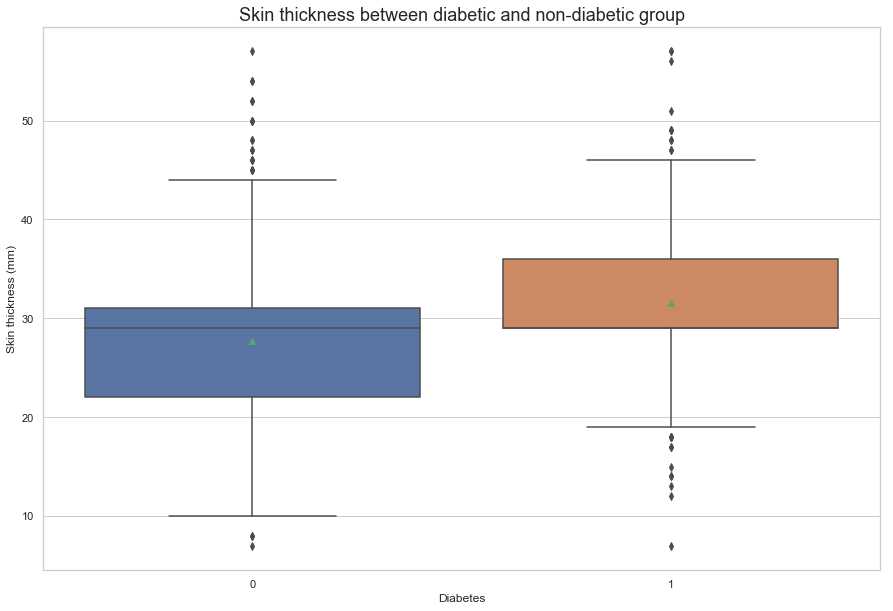

In [39]:
# compare skin thickness
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.boxplot(x='Outcome', y='SkinThickness', data=diabetes, showmeans=True)
ax.set_title('Skin thickness between diabetic and non-diabetic group', size=18)
ax.set_xlabel('Diabetes')
ax.set_ylabel('Skin thickness (mm)')
plt.show()

We can see from the graph above that the skin thickness in diabetic group is thicker than in the non-diabetic group, however, we can see that there are many variation in both group, we need a statistical method to show whether the difference is significant or not. In the following we will use the t-test to see whether the mean difference is significant in each group.

In [27]:
# import scipy package
from scipy.stats import ttest_ind
diabetic = diabetes[diabetes['Outcome'] == 1]
non_diabetic = diabetes[diabetes['Outcome'] == 0]

t, p_val = ttest_ind(diabetic['SkinThickness'], non_diabetic['SkinThickness'], equal_var=False)
print('t statistics: {}'.format(t))
print('p value: {}'.format(p_val))

t statistics: 6.264703796473057
p value: 7.15230736080941e-10


Next we will compare the average preganacies between diabetic and non-diabetic groups by using the barplot since `Preganancies` is a discrete variable and showing a distribution of it is more meaningless.

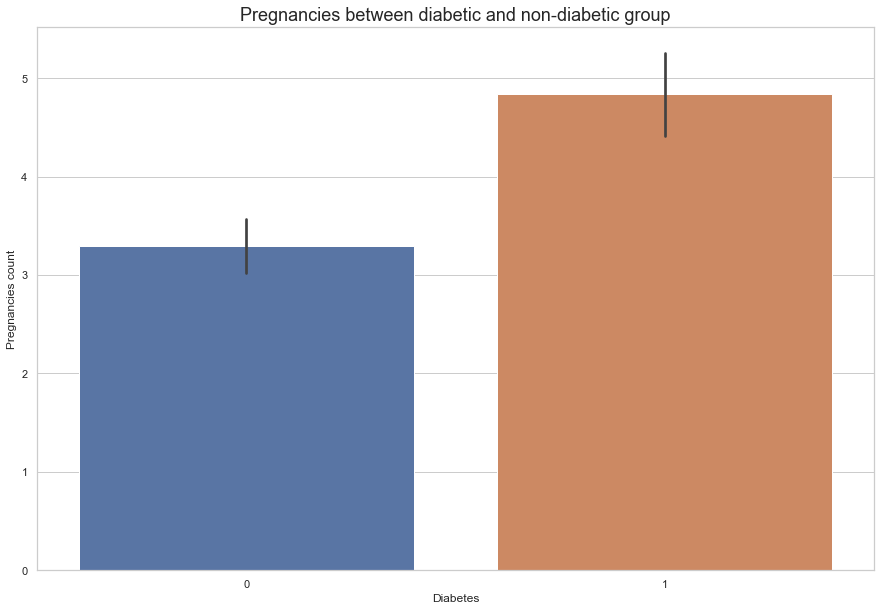

In [25]:
# compare preganancies
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(x='Outcome', y='Pregnancies', data=diabetes)
ax.set_title('Pregnancies between diabetic and non-diabetic group', size=18)
ax.set_xlabel('Diabetes')
ax.set_ylabel('Pregnancies count')
plt.show()

It looks like the difference is quite a lot, again, we will perform t-test to see if the difference is statistically significant

In [28]:
# perform t-test again to compare the difference
t, p_val = ttest_ind(diabetic['Pregnancies'], non_diabetic['Pregnancies'], equal_var=False)
print('t statistics: {}'.format(t))
print('p value: {}'.format(p_val))

t statistics: 5.892432922934636
p value: 7.343766746336154e-09


We can see that the p-value is pretty low and close to zero, this suggest that the difference of average preganancies between diabetic and non-diabetic group is significant.

Since `Preganancies` can be treated as a discrete variable, we will make another plot to see the percentange of diabetic patients in each `Pregnancies` category. 

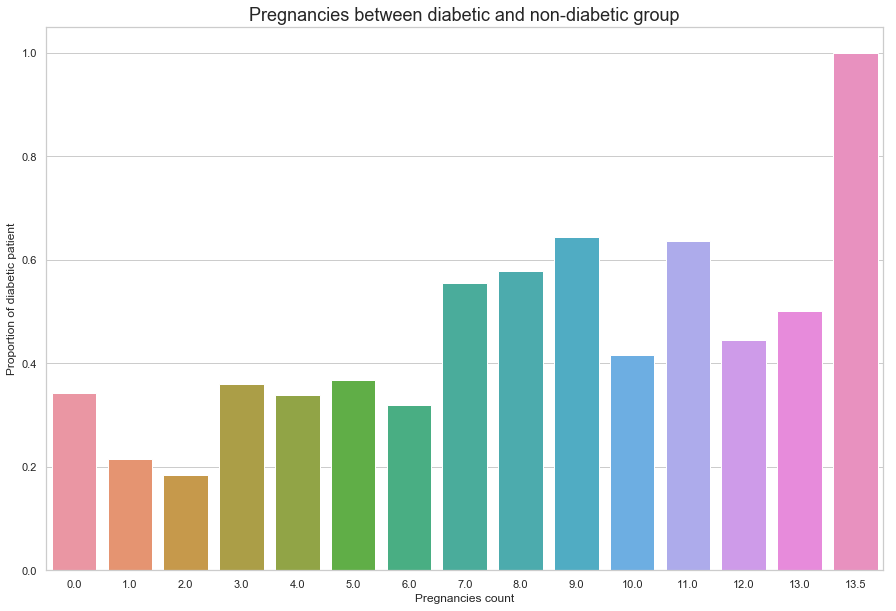

In [31]:
# another approach
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(x='Pregnancies', y='Outcome', data=diabetes, ci=None)
ax.set_title('Pregnancies between diabetic and non-diabetic group', size=18)
ax.set_xlabel('Pregnancies count')
ax.set_ylabel('Proportion of diabetic patient')
plt.show()

We can see that the trend was not that obvious, the proportion of diabetic patients is higher in higher pregnancies count group but there exist some exception, this could be due to that some pregnancies group have only few sample and exist more variance that did not truly reflect the population.

#### Answer: We can see from the graph that the skin thickness is different betweeb diabetic and non-diabetic group, we also perfromed a t-test to compare between the mean in two groups and since the p-value is quite low and almost close to zero, we can show that there are indeed a significant difference of the skin thickness between diabetic and non-diabetic patients. Regarding the preganacies vs diabetes, we can see that the average preganancies in non-diabetic group is significant lower than the diabetic group and there is a general trend of the higher pregnancies count, the higher proportion of diabetic patient.

### Question 6: What are the relationship between BMI vs Glucose? BMI vs Blood Pressure? BMI vs SkinThickness?

To answer questions like above, the most effective plot should be the scatter plot, this can demonstrate the correlation between two continuous variable, we will plot the BMI vs Glucose, Blood Pressure and Skin Thickness together.

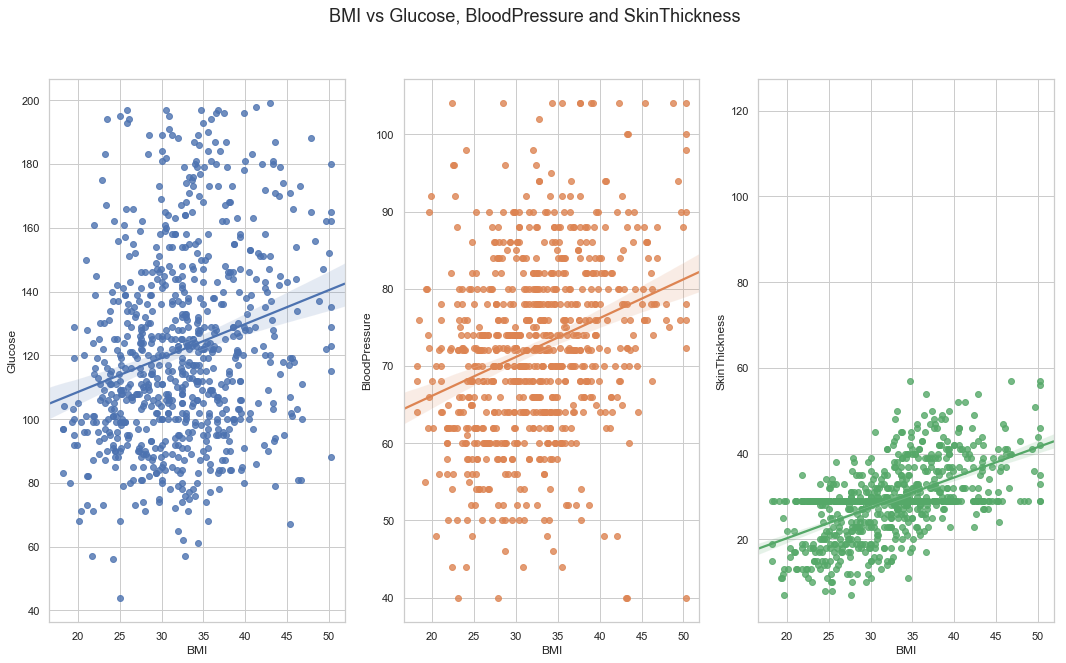

In [49]:
fig, ax = plt.subplots(1,3,figsize=(18,10))
sns.regplot(x='BMI', y='Glucose', data=diabetes, ax=ax[0])
sns.regplot(x='BMI', y='BloodPressure', data=diabetes, ax=ax[1])
sns.regplot(x='BMI', y='SkinThickness', data=diabetes, ax=ax[2])
fig.suptitle('BMI vs Glucose, BloodPressure and SkinThickness', size=18)
plt.show()

Besides the graph, we can also calculat the correlation coefficient between BMI and these three variables

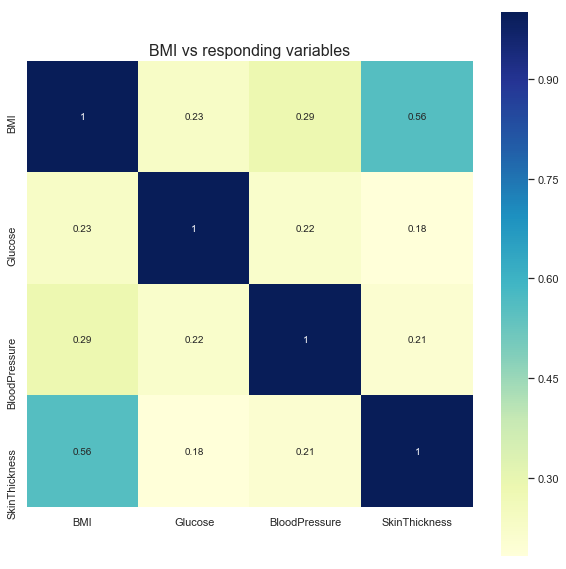

In [59]:
# calculate the correlation between variables and plot the heat map
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(diabetes[['BMI', 'Glucose', 'BloodPressure', 'SkinThickness']].corr(), annot=True, cmap="YlGnBu",
            square=True)
ax.set_title('BMI vs responding variables', size=16)
plt.show()

#### Answer: From the graph above, we can see there are positive relationship between BMI and Glucose, BloodPressure and SkinThickness, therefore, the higher the BMI, the higher the responding variables, however, this does not imply causation since this is only an observation rather than an independent experiment, also we could see that the data are quite scattered in all three variables instead of laying near the regression line, suggesting that the correlation is relatively low, this can be varified by the correlation heatmap plot showing above. We can see that in the last graph of scattering plot, there exist a horizontal dot, this is due to the imputation we had earlier in the data cleaning notebook.

### Question 7: What are the relationship between Age vs DiabetesPedigreeFunction? Age vs BMI? Age vs Insulin?

We will apply the same idea we used previouly, this time we use `Age` as our independent variable and `DiabetesPedigreeFunction`, `BMI` and `Insulin` as our responding variables.

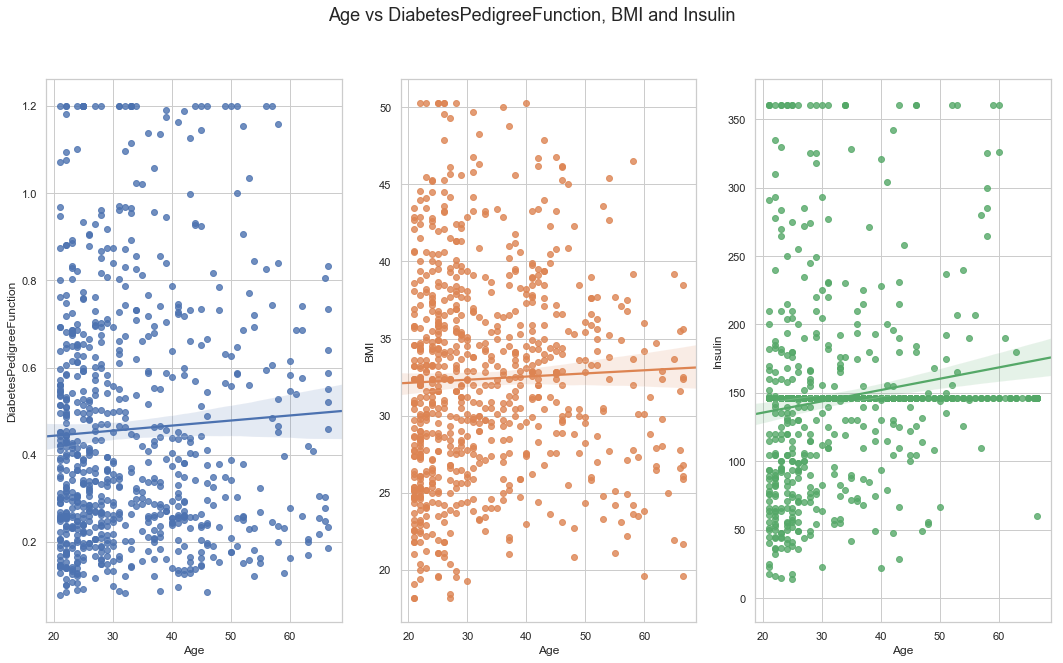

In [60]:
fig, ax = plt.subplots(1,3,figsize=(18,10))
sns.regplot(x='Age', y='DiabetesPedigreeFunction', data=diabetes, ax=ax[0])
sns.regplot(x='Age', y='BMI', data=diabetes, ax=ax[1])
sns.regplot(x='Age', y='Insulin', data=diabetes, ax=ax[2])
fig.suptitle('Age vs DiabetesPedigreeFunction, BMI and Insulin', size=18)
plt.show()

We will plot the correlation heatmap as well

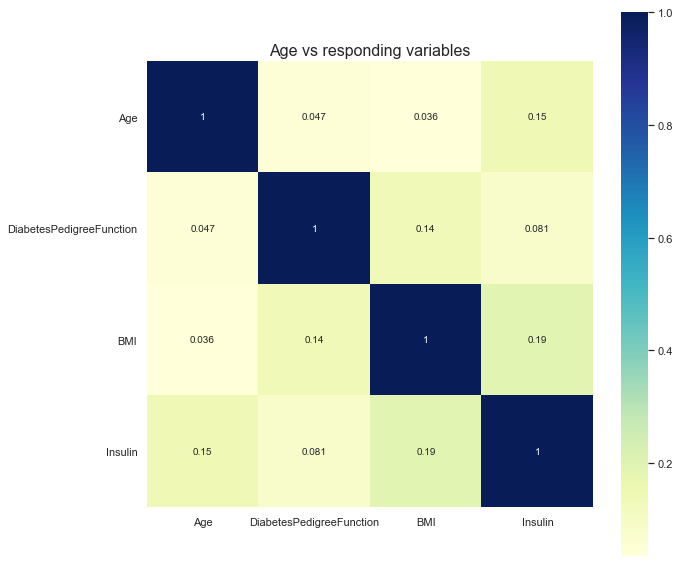

In [61]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(diabetes[['Age', 'DiabetesPedigreeFunction', 'BMI', 'Insulin']].corr(), annot=True, cmap="YlGnBu",
            square=True)
ax.set_title('Age vs responding variables', size=16)
plt.show()

#### Answer: We can see from both the scattering plot and correlation heatmap that Age exist little to none relationship between those three responding variables, this might be a bit counter intuitive, since we might expect that older people are more out of shape and might have higher BMI, or older people have poorer pancreas function that might cause limited secretion of insulin. However, the graph above suggested this might not be the case.